<a href="https://colab.research.google.com/github/evroth/gsb545repo/blob/main/PA_AdaBoost.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Practice Activity: Classifying Penguins with AdaBoost

## The Data

In [3]:
import pandas as pd
df_lter = pd.read_csv("penguins_lter.csv")
df_size = pd.read_csv("penguins_size.csv")

In [5]:
df_size.sample(5)

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
311,Gentoo,Biscoe,52.2,17.1,228.0,5400.0,MALE
280,Gentoo,Biscoe,45.3,13.8,208.0,4200.0,FEMALE
102,Adelie,Biscoe,37.7,16.0,183.0,3075.0,FEMALE
212,Chinstrap,Dream,51.9,19.5,206.0,3950.0,MALE
54,Adelie,Biscoe,34.5,18.1,187.0,2900.0,FEMALE


In [10]:
df_size.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [6]:
df_lter.sample(5)

,studyName,Sample Number,Species,Region,Island,Stage,Individual ID,Clutch Completion,Date Egg,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Comments
78,PAL0809,79,Adelie Penguin (Pygoscelis adeliae),Anvers,Torgersen,"Adult, 1 Egg Stage",N38A1,Yes,11/9/08,36.2,16.1,187.0,3550.0,FEMALE,7.82381,-26.51382,NaN
236,PAL0708,17,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N39A1,Yes,11/27/07,42.0,13.5,210.0,4150.0,FEMALE,7.63884,-25.52627,NaN
115,PAL0910,116,Adelie Penguin (Pygoscelis adeliae),Anvers,Biscoe,"Adult, 1 Egg Stage",N61A2,Yes,11/17/09,42.7,18.3,196.0,4075.0,MALE,8.91434,-26.42018,NaN
256,PAL0809,37,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N4A1,Yes,11/2/08,42.6,13.7,213.0,4950.0,FEMALE,7.96935,-26.70968,NaN
292,PAL0809,73,Gentoo penguin (Pygoscelis papua),Anvers,Biscoe,"Adult, 1 Egg Stage",N55A1,Yes,11/9/08,48.2,15.6,221.0,5100.0,MALE,8.24651,-26.66958,NaN


I think we just need the size df for this analysis.

## Preprocessing

In [23]:
df = pd.get_dummies(df_size, columns = ['island','sex'])
df.dropna(inplace=True)

In [24]:
df.sample(5)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Biscoe,island_Dream,island_Torgersen,sex_.,sex_FEMALE,sex_MALE
227,Gentoo,46.7,15.3,219.0,5200.0,1,0,0,0,0,1
332,Gentoo,43.5,15.2,213.0,4650.0,1,0,0,0,1,0
151,Adelie,41.5,18.5,201.0,4000.0,0,1,0,0,0,1
137,Adelie,40.2,20.1,200.0,3975.0,0,1,0,0,0,1
75,Adelie,42.8,18.5,195.0,4250.0,0,0,1,0,0,1


In [32]:
# Separate features and target variable
X = df.drop(['species'], axis=1)
y = df['species']

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y = le.fit_transform(y)

## Model 1: Bagging Benchmark

Testing out performance of bagged knn, decision tree, svm, and random forest classification tecniques.

>knn 0.777 (0.066)
>cart 0.980 (0.019)
>svm 0.725 (0.076)
>rf 0.992 (0.013)


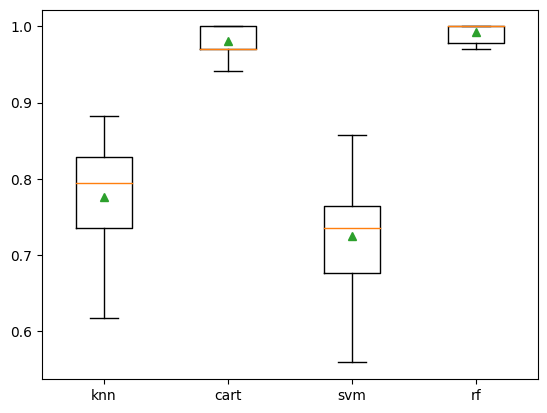

In [31]:
# compare machine learning models for regression
from numpy import mean
from numpy import std
from sklearn.datasets import make_classification
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from sklearn.svm import SVC
from matplotlib import pyplot
 
# get a list of models to evaluate
def get_models():
 models = dict()
 models['knn'] = BaggingClassifier(KNeighborsClassifier())
 models['cart'] = BaggingClassifier(DecisionTreeClassifier())
 models['svm'] = BaggingClassifier(SVC())
 models['rf'] = BaggingClassifier(RandomForestClassifier(n_estimators = 100, random_state=7), n_estimators = 2, random_state = 7)
 return models
 
# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
 cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
 scores = cross_val_score(model, X, y, scoring='accuracy', cv=cv, n_jobs=-1, error_score='raise')
 return scores
 
# get the models to evaluate
models = get_models()

# evaluate the models and store results
results, names = list(), list()
for name, model in models.items():
 scores = evaluate_model(model, X, y)
 results.append(scores)
 names.append(name)
 print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()

The best accuracy scores of the four selected bagging models are the random forest model and the decision tree model. The best overall accuracy was the random forest at 99.2%

## AdaBoost Models:

**Model 1**

In [33]:
from sklearn.ensemble import AdaBoostClassifier

estimator = RandomForestClassifier(n_estimators = 100, random_state=7)
model = AdaBoostClassifier(estimator=estimator,
                              n_estimators=3, algorithm="SAMME",
                              random_state=0)
cross_val_score(model,X,y,scoring="accuracy",cv=10).mean()

0.9911764705882353

This randomforest model with adaptive boosting has a cross validated accuracy score of 99.1%

**Model 2**


In [49]:
estimator = DecisionTreeClassifier(criterion='entropy', max_depth = 5)
model = AdaBoostClassifier(estimator=estimator,
                              n_estimators=3, algorithm="SAMME",
                              random_state=0)
cross_val_score(model,X,y,scoring="accuracy",cv=10).mean()

0.9823529411764707

Compared to the first model, using adaptive boosting with a decision tree, we find a cross validated accuracy rate of 98.2%. The tuning of the decision tree parameter "max_depth" also plays a big role in the model performance, where lower max depths are associated with lower accuracy.

**Model 3**

In [56]:
estimator = SVC()
model = AdaBoostClassifier(estimator=estimator,
                              n_estimators=2, algorithm="SAMME",
                              random_state=0)
cross_val_score(model,X,y,scoring="accuracy",cv=4).mean()

0.4415184678522572

This model is kind of crap.

## Summary

In conclusion, the best performing model that was put together in this activity was the random forest with bagging. But it is only .1 better than the randomforest we created is adaptive boositing. Changhing the parameters of each may tune the models to be better or worse, and it is possible to achieve slightly better performance.